# MAC 5768 - Projeto EP - Parte 1 




#### Integrantes do grupo:
- Ysabelle Pinheiro de Sousa - ysabellesousa@gmail.com - 11341314
- Roberto Gaui - rgaui@yahoo.com.br - 1851224
- Joaquin Lorenzo Pereira Condori - joaquin.condori@usp.br - 11857963


####  Link para repositório projeto: 

https://github.com/YsabelleSousa/mac_5768_ep_visao_proc_imagens

#### Instrução para download dos dados:

Link: https://drive.google.com/file/d/10zncW_BxhBd2x0CpuddXFffeBKK05HAI/view?usp=sharing

**1)** Gerar o link compartilhável da pasta zipada no google drive e atribuir a permissão de leitura para **"Qualquer pessoa com o link"**

**2)** Baixar os dados do link compartilhável e colocar na pasta **"data"** do repositório.

**3)** Escolher o path de destino e atribuir à variável **"data_path"** na seção **"Extraindo informações dos dados para DF"**


## Importando Bibliotecas

In [1]:
import pandas as pd
from utils import utils
from google_drive_downloader import GoogleDriveDownloader as gdd
from PIL import Image

import os
import sys

## Extraindo informações dos dados para DF

Nesta seção, lemos as imagens em seu diretório e extraímos as informações do seu metadados (nome da imagem) para atribuir em um dataframe que será consumido nas próximas seções.

In [2]:
data_path = 'data/DATA_EP1'

In [3]:
df_dados = pd.DataFrame(columns = ['classe','num_objeto','tp_fundo','dia_noite','dentro_fora','num_repeticao','extensao'])

In [4]:
#Extraindo informações dos metadados e atribuindo à um dataframe
for root, subdirs, files in os.walk(os.path.abspath(data_path)):
    
    for file in files:
        if file.count('_') == 5:
            df_dados = df_dados.append({
            
                        'classe': file.split('_')[0],
                        'num_objeto': file.split('_')[1],
                        'tp_fundo': file.split('_')[2],
                        'dia_noite': file.split('_')[3],
                        'dentro_fora': file.split('_')[4],
                        'num_repeticao': file.split('_')[5].split('.')[0],
                        'extensao': file.split('_')[5].split('.')[1],
                        'resolucao': Image.open(root + '/' + file).size
            }, ignore_index=True)
            

In [5]:
df_dados

,classe,num_objeto,tp_fundo,dia_noite,dentro_fora,num_repeticao,extensao,resolucao
0,tenis,3,branco,noite,fora,1,jpg,"(4160, 3120)"
1,tenis,1,verde,dia,dentro,2,jpg,"(3120, 4160)"
2,tenis,3,branco,noite,dentro,2,jpg,"(3120, 4160)"
3,tenis,1,azul,noite,dentro,2,jpg,"(4160, 3120)"
4,tenis,2,azul,dia,dentro,1,jpg,"(4160, 3120)"
...,...,...,...,...,...,...,...,...
1111,celular,2,branco,dia,fora,3,jpg,"(4032, 3024)"
1112,celular,3,branco,noite,dentro,2,jpg,"(4032, 3024)"
1113,celular,3,laranja,dia,fora,1,jpg,"(3024, 4032)"
1114,celular,2,branco,dia,fora,2,jpg,"(4032, 3024)"


## Tabela Sumária Global

Nesta seção, sumarizamos algumas informações das imagens para possibilitar uma visualização mais genérica dos dados.

In [6]:
df_tbl_sumaria = pd.DataFrame(columns=['num_classes','num_imagens','tamanho_base_mb','extensoes_imagens'])                      

In [7]:
df_tbl_sumaria = df_tbl_sumaria.append({
    'num_classes': df_dados['classe'].nunique(),
    'num_imagens': len(df_dados),
    'tamanho_base_mb': utils.return_folder_size_mb('data/'),
    'extensoes_imagens': df_dados['extensao'].str.lower().unique()
}, ignore_index=True)

In [8]:
df_tbl_sumaria

,num_classes,num_imagens,tamanho_base_mb,extensoes_imagens
0,10,1116,3995.34,[jpg]


## Tabela Sumária Detalhada

Já nesta seção, as informações apresentadas são mais detalhadas em cada classe de objetos captadas.

In [9]:
df_tbl_sumaria_detalhada = df_dados.groupby('classe', as_index=False).agg({
    'num_objeto': pd.Series.nunique,
    'tp_fundo': lambda x: dict(x.value_counts()),
    'dia_noite': lambda x: dict(x.value_counts()),
    'dentro_fora': lambda x: dict(x.value_counts()),
    'num_repeticao': 'nunique',
    'resolucao': 'unique',
    'extensao': 'count'
})

In [10]:
df_tbl_sumaria_detalhada.columns = ['classe','qtd_objetos','variacoes_fundo','variacoes_iluminacao_externa','variacoes_iluminacao_local','qtd_repeticoes','resolucoes','total_amostras']

In [11]:
df_tbl_sumaria_detalhada

,classe,qtd_objetos,variacoes_fundo,variacoes_iluminacao_externa,variacoes_iluminacao_local,qtd_repeticoes,resolucoes,total_amostras
0,camiseta,3,"{'amarelo': 36, 'neutro': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4608, 3456)]",108
1,caneca,3,"{'branco': 36, 'laranja': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4032, 3024), (3024, 4032)]",108
2,caneta,3,"{'amarelo': 36, 'neutro': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4608, 3456)]",108
3,celular,3,"{'branco': 36, 'laranja': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4032, 3024), (3024, 4032)]",108
4,colher,3,"{'branco': 36, 'laranja': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(3024, 4032), (4032, 3024)]",108
5,copo,4,"{'branco': 48, 'verde': 48, 'azul': 48}","{'dia': 72, 'noite': 72}","{'fora': 72, 'dentro': 72}",3,"[(4160, 3120), (3120, 4160)]",144
6,flauta,3,"{'branco': 36, 'verde': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4160, 3120), (3120, 4160)]",108
7,garfo,3,"{'branco': 36, 'verde': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4160, 3120), (3120, 4160)]",108
8,livro,3,"{'amarelo': 36, 'neutro': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4608, 3456)]",108
9,tenis,3,"{'branco': 36, 'verde': 36, 'azul': 36}","{'dia': 54, 'noite': 54}","{'fora': 54, 'dentro': 54}",3,"[(4160, 3120), (3120, 4160)]",108


## Plotando Imagens

Aqui, geramos um sample de imagens randômicas da base com uma visuzalição MNIST-like 

100%|██████████| 9/9 [00:28<00:00,  3.15s/it]


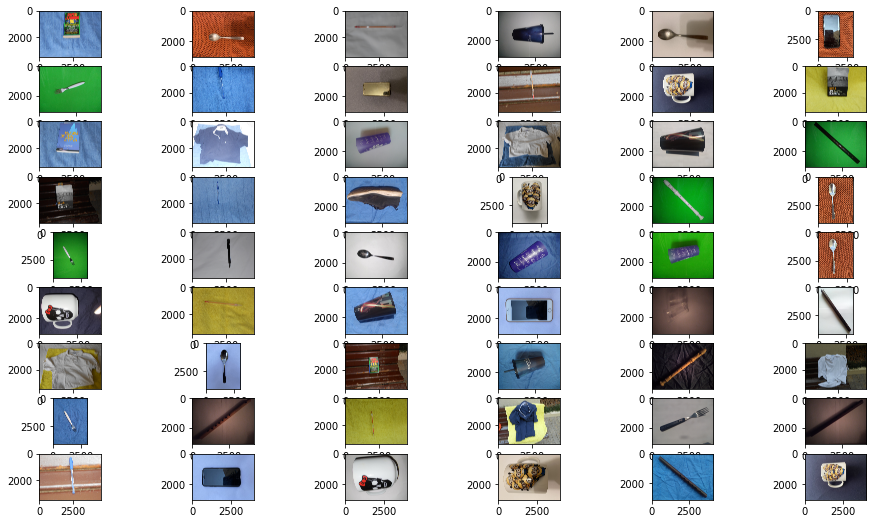

In [12]:
utils.plot_images('data/DATA_EP1')